# K-MEANS

Metodo de agrpamiento que divide un conjuto de datos en k grupos o clústeres a partir de centroides

##Práctica
Analizar el archivo analisis.csv, en donde se evalua a la luz del "Ocean: The Big five" aspectos de la personalidad de diferentes figuras púbicas en X


*   "op": Openness to experience
*   "co": Consciente



##Categorías


1.   Actor/Actriz
2.   Cantante
3.   Modelo
4.   TV, series
5.   Radio
6.   Tecnologia
7.   Deportes
8.   Politica
9.   Escritores



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["figure.figsize"]=(16,9)
plt.style.use("ggplot")

In [21]:
dataframe=pd.read_csv(r"analisis.csv")
dataframe.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [11]:
dataframe.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


In [13]:
dataframe.groupby("categoria").size()

,0
categoria,
1,27
2,34
3,9
4,19
5,4
6,8
7,17
8,16
9,6


<function matplotlib.pyplot.show(close=None, block=None)>

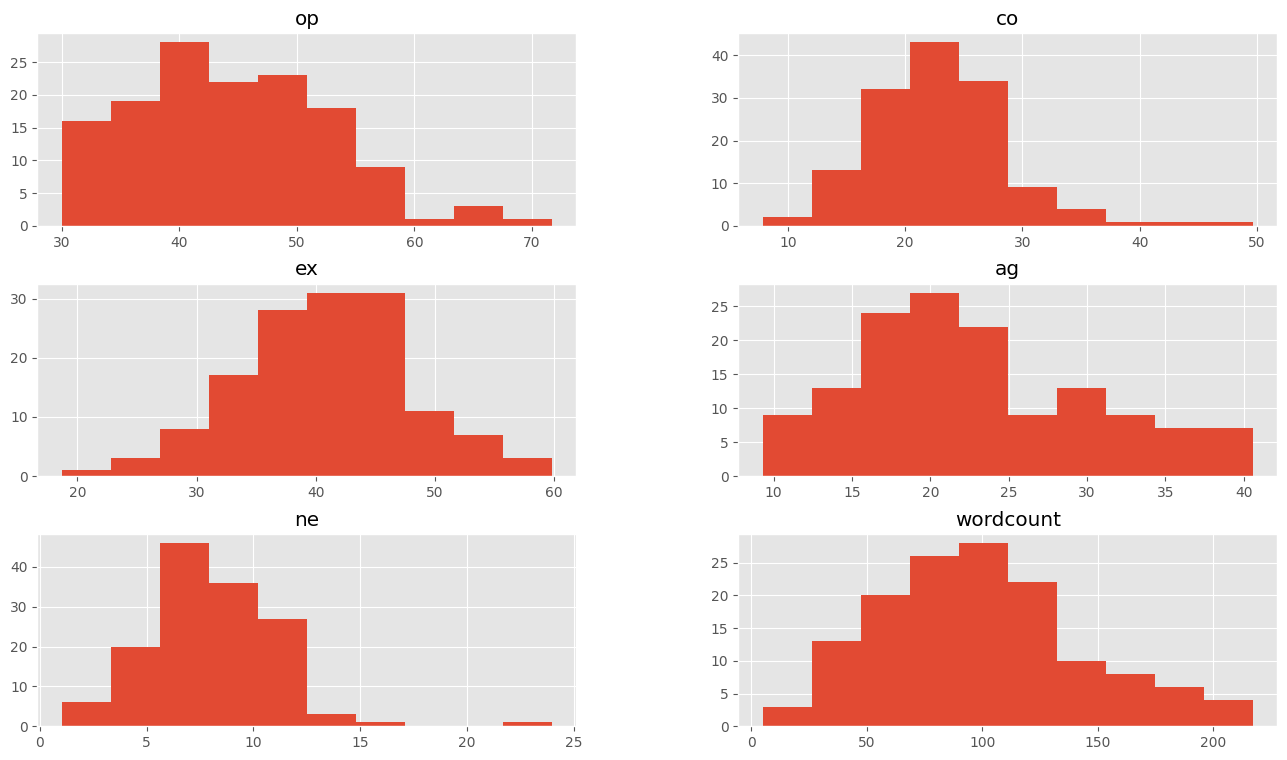

In [14]:
dataframe.drop(columns=["categoria"]).hist()
plt.show

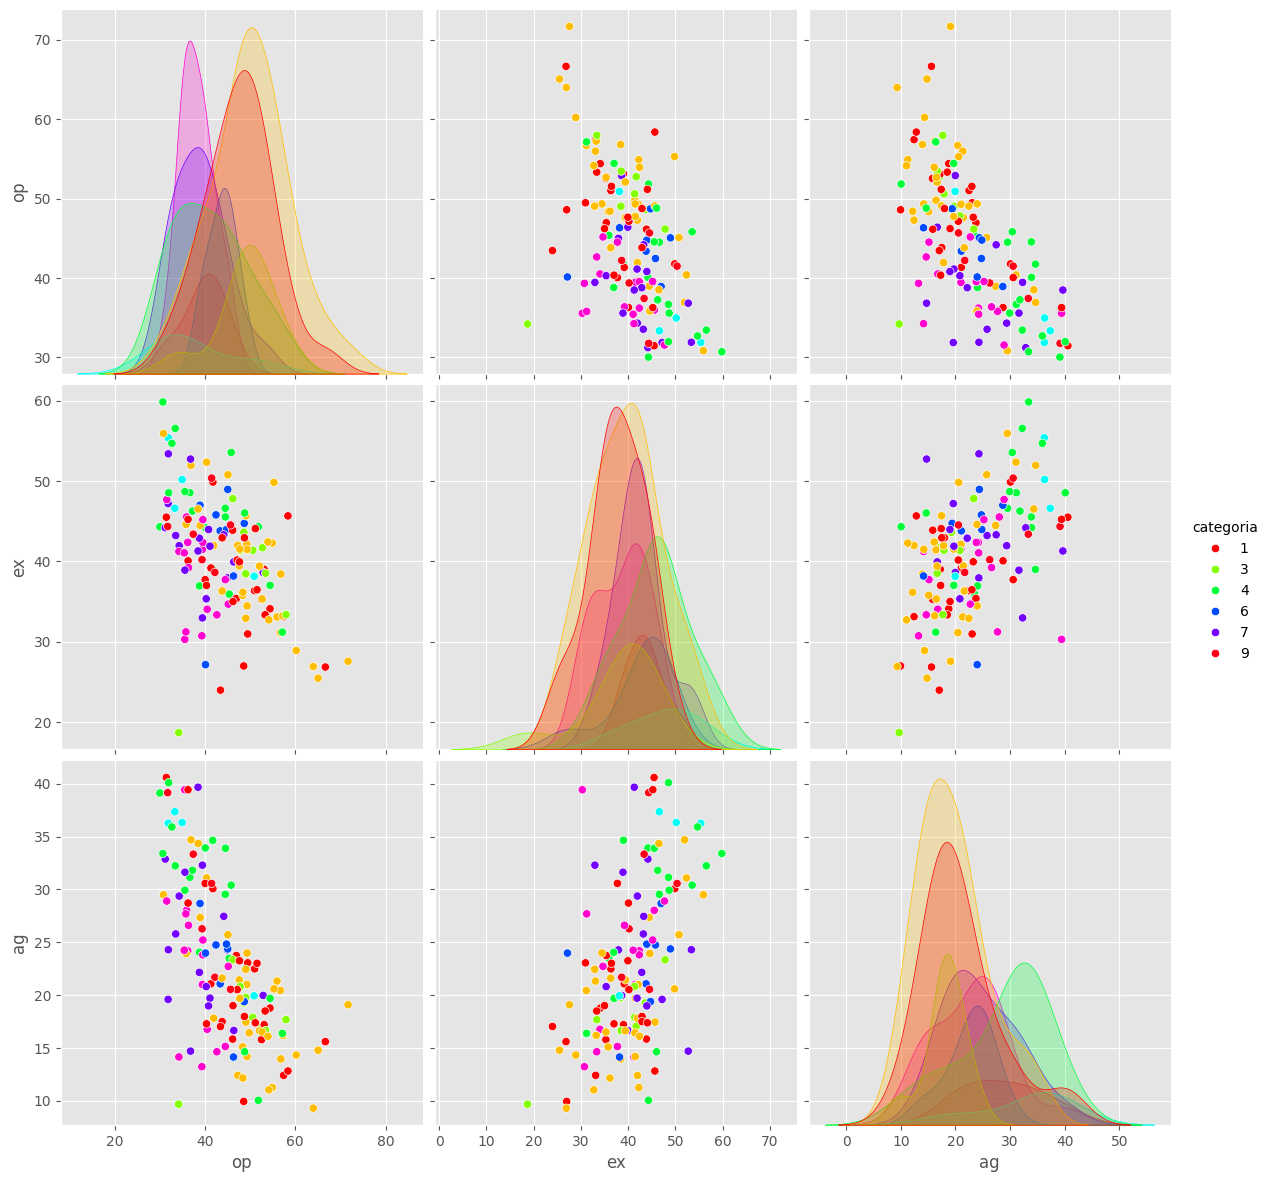

In [15]:
sb.pairplot(dataframe.dropna(),hue="categoria",height=4,vars=["op","ex","ag"],kind="scatter", palette="hsv")

In [17]:
X=np.array(dataframe[["op","ex","ag"]])
y=np.array(dataframe["categoria"])
X.shape

(140, 3)

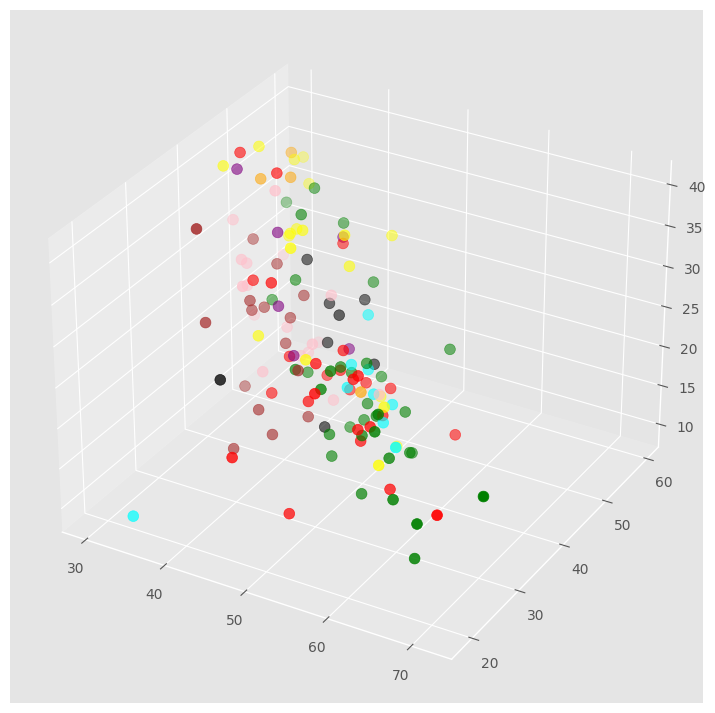

In [19]:
fig=plt.figure()
ax=fig.add_subplot(111,projection="3d")
colores=["blue","red","green","cyan","yellow","orange","black","pink","brown","purple"]
asignar=[]
for row in y:
  asignar.append(colores[row])
ax.scatter(X[:,0],X[:,1],X[:,2],c=asignar,s=60)
plt.show()

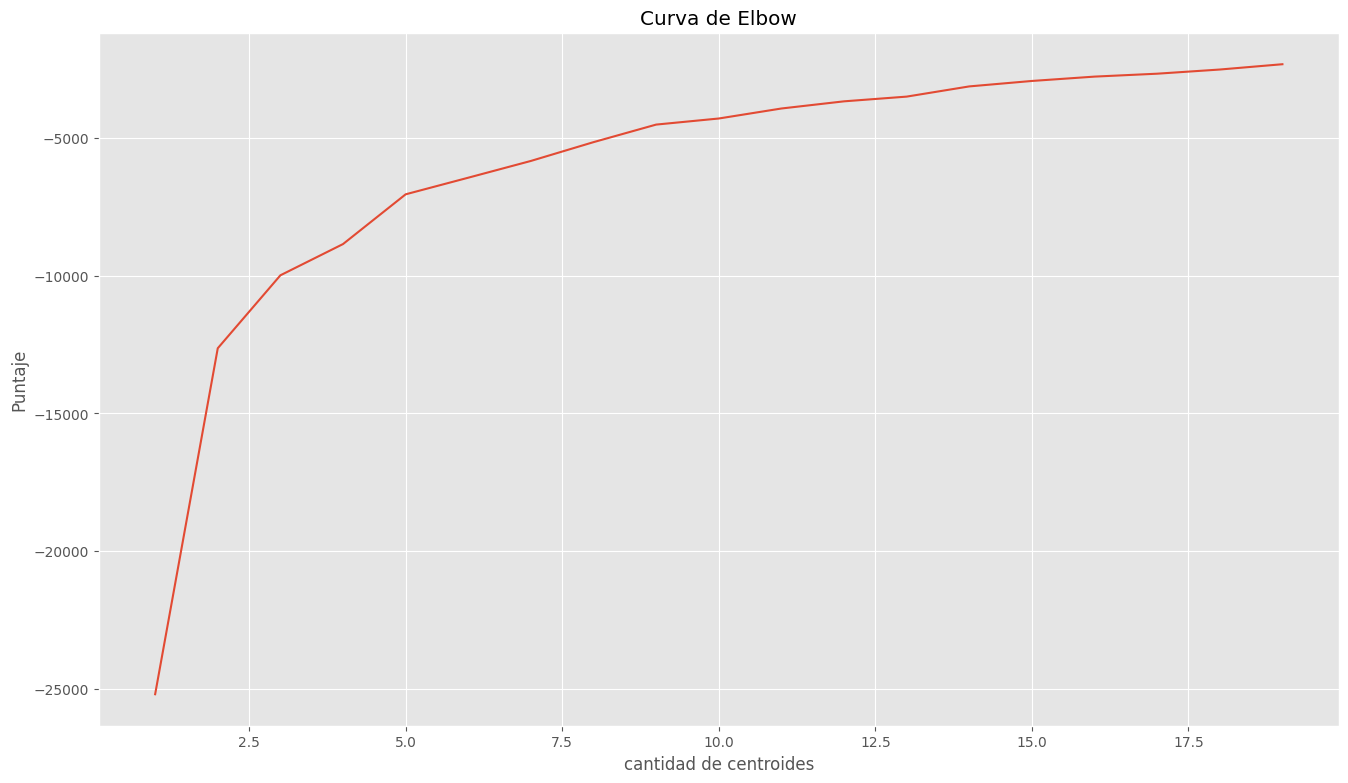

In [22]:
Nc=range(1,20)
kmeans=[KMeans(n_clusters=i) for i in Nc]
kmeans
score=[kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel("cantidad de centroides")
plt.ylabel("Puntaje")
plt.title("Curva de Elbow")
plt.show()

In [23]:
kmeans=KMeans(n_clusters=5).fit(X)
centroides=kmeans.cluster_centers_
print(centroides)

[[49.69968826 39.98138077 18.11479838]
 [35.78452647 48.9057505  33.56371987]
 [59.25320707 31.29770653 15.9896352 ]
 [41.25709443 27.84871157 15.040178  ]
 [39.78106868 41.37355907 24.51612239]]


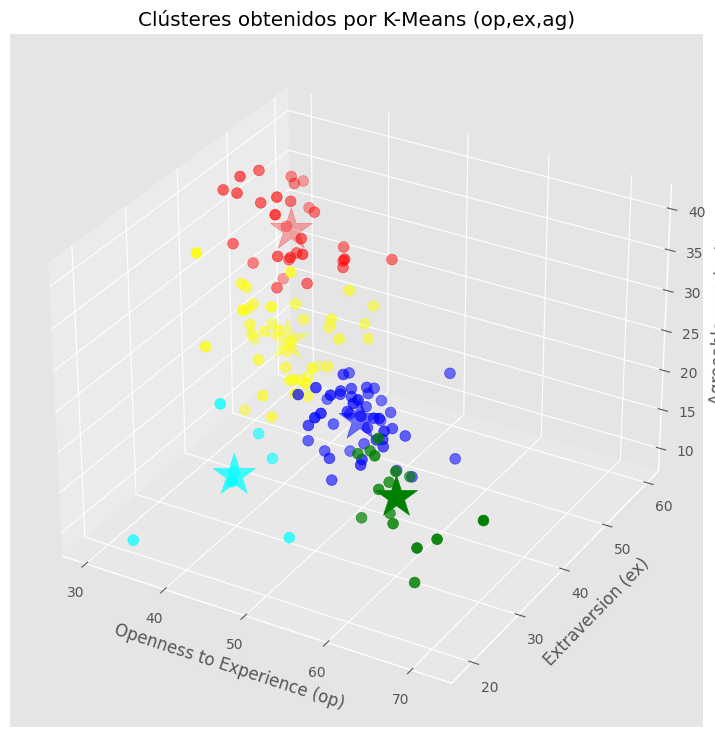

In [25]:
labels=kmeans.predict(X)
C=kmeans.cluster_centers_
colores=["blue", "red","green","cyan","yellow"]
asignar=[]
for row in labels:
  asignar.append(colores[row])
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2],c=asignar,s=60)
ax.scatter(C[:,0],C[:,1],C[:,2],marker="*",c=colores,s=1000)
ax.set_xlabel("Openness to Experience (op)")
ax.set_ylabel("Extraversion (ex)")
ax.set_zlabel("Agreeableness (ag)")
ax.set_title("Clústeres obtenidos por K-Means (op,ex,ag)")
plt.show()

Text(0.5, 1.0, 'op vs ex')

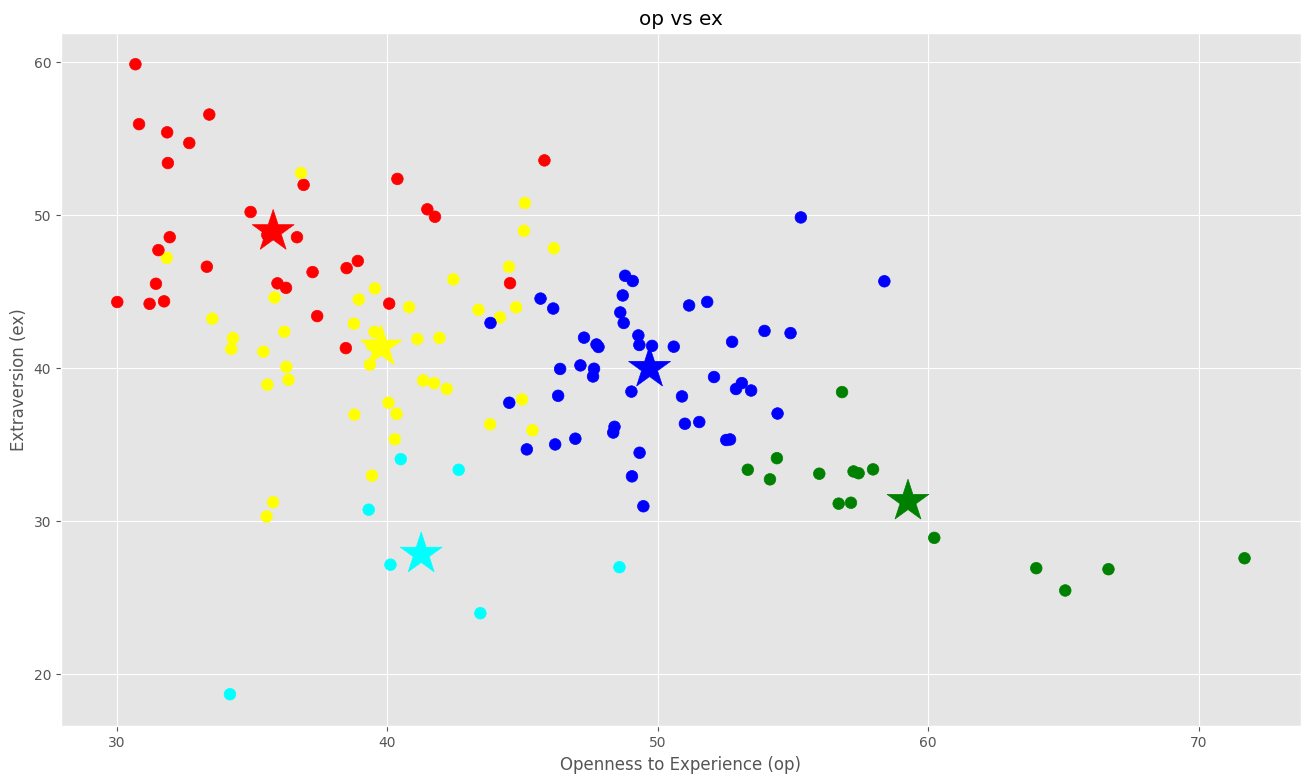

In [26]:
#Graficando op vs ex
f1=dataframe["op"].values
f2=dataframe["ex"].values

plt.scatter(f1,f2,c=asignar,s=70)
plt.scatter(C[:,0],C[:,1],marker="*",c=colores,s=1000)
plt.xlabel("Openness to Experience (op)")
plt.ylabel("Extraversion (ex)")
plt.title("op vs ex")

In [27]:
copy=pd.DataFrame()
copy ["Usuario"]=dataframe["usuario"].values
copy ["Categoria"]=dataframe["categoria"].values
copy ["label"]=labels;
cantidadGrupo=pd.DataFrame()
cantidadGrupo["Color"]=colores
cantidadGrupo["Cantidad"]=copy.groupby("label").size()
cantidadGrupo

,Color,Cantidad
0,blue,47
1,red,30
2,green,15
3,cyan,7
4,yellow,41


In [29]:
group_referrer_index=copy["label"]==0
group_referrer=copy[group_referrer_index]

diversidadGrupo=pd.DataFrame()
diversidadGrupo["Categoria"]=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo["cantidad"]=group_referrer.groupby("Categoria").size()
diversidadGrupo

,Categoria,cantidad
0,0,NaN
1,1,14.0
2,2,16.0
3,3,6.0
4,4,3.0
5,5,1.0
6,6,2.0
7,7,2.0
8,8,2.0
9,9,1.0


In [30]:
closest,_ = pairwise_distances_argmin_min(kmeans.cluster_centers_,X)
closest

array([ 21,   4,  82, 116,  64])

In [31]:
user=dataframe["usuario"].values
for row in closest:
  print(user[row])

carmenelectra
alfredocasero1
JudgeJudy
Rep_Hunter
ierrejon


In [32]:
X_new=np.array([[45.92,57.74,15.66]]) #davidguetta

new_labels=kmeans.predict(X_new)
print(new_labels)

[0]
